In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive, files
import os


In [ ]:
drive.mount('/content/drive')
dir_path = "/content/drive/MyDrive/DR/colored_images/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/DR/archive.zip"
extract_path = "/content/drive/MyDrive/DR/"

# Open the zip file for reading
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all files to the given directory
    zip_ref.extractall(extract_path)

In [ ]:
for root, dirs, files in os.walk(dir_path):
    # Print the path of each file
    for file in files:
        print(os.path.join(root, file))

/content/drive/MyDrive/DR/colored_images/Mild/0024cdab0c1e.png
/content/drive/MyDrive/DR/colored_images/Mild/00cb6555d108.png
/content/drive/MyDrive/DR/colored_images/Mild/0124dffecf29.png
/content/drive/MyDrive/DR/colored_images/Mild/01b3aed3ed4c.png
/content/drive/MyDrive/DR/colored_images/Mild/0369f3efe69b.png
/content/drive/MyDrive/DR/colored_images/Mild/03e25101e8e8.png
/content/drive/MyDrive/DR/colored_images/Mild/04ac765f91a1.png
/content/drive/MyDrive/DR/colored_images/Mild/059bc89df7f4.png
/content/drive/MyDrive/DR/colored_images/Mild/05a5183c92d0.png
/content/drive/MyDrive/DR/colored_images/Mild/0684311afdfc.png
/content/drive/MyDrive/DR/colored_images/Mild/06b71823f9cd.png
/content/drive/MyDrive/DR/colored_images/Mild/07929d32b5b3.png
/content/drive/MyDrive/DR/colored_images/Mild/07a1c7073982.png
/content/drive/MyDrive/DR/colored_images/Mild/086d41d17da8.png
/content/drive/MyDrive/DR/colored_images/Mild/09935d72892b.png
/content/drive/MyDrive/DR/colored_images/Mild/0a3202889

In [ ]:
os.listdir(dir_path)

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image,UnidentifiedImageError



In [ ]:
def load_imgs(impath):
    imgs=[]
    label=[]
    l1=os.listdir(impath)
    for i in l1:
        l2=os.listdir(impath+'/'+i)
        for j in l2:
                try:
                  filepath=impath+i+'/'+j
                  img=Image.open(filepath)
                  imgs.append(np.array(img)) 
                  label.append(i)
                except UnidentifiedImageError as e:
                  print(f'Error reading image at file path {filepath}: {e}')
                  continue           
    return np.array(imgs),label

    
    

In [ ]:
x,y=load_imgs(dir_path)
print(x.shape)
print(len(y))

(3662, 224, 224, 3)
3662


In [ ]:
print(y)

['Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild',

In [ ]:
unique_categories, category_counts = np.unique(y, return_counts=True)
for i in range(len(unique_categories)):
    print(f"Category '{unique_categories[i]}' occurs {category_counts[i]} times.")


Category 'Mild' occurs 370 times.
Category 'Moderate' occurs 999 times.
Category 'No_DR' occurs 1805 times.
Category 'Proliferate_DR' occurs 295 times.
Category 'Severe' occurs 193 times.


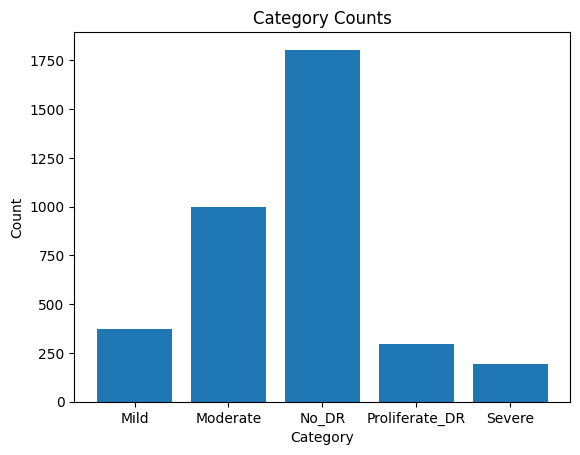

In [ ]:
#Plot a bar graph
plt.bar(unique_categories, category_counts)
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
target=pd.Series(y,dtype='category')
print(target)

0         Mild
1         Mild
2         Mild
3         Mild
4         Mild
         ...  
3657    Severe
3658    Severe
3659    Severe
3660    Severe
3661    Severe
Length: 3662, dtype: category
Categories (5, object): ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [ ]:
#Encoding the categories: 
t=target.cat.codes
print(t)

0       0
1       0
2       0
3       0
4       0
       ..
3657    4
3658    4
3659    4
3660    4
3661    4
Length: 3662, dtype: int8


In [ ]:
# get the unique categories in the Series
unique_categories = target.unique()

# create a dictionary that maps each category to its corresponding integer code
code_map = dict(zip(unique_categories, t.unique()))

print(code_map)

{'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferate_DR': 3, 'Severe': 4}


In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,t,test_size=0.2,shuffle=True)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(2929, 224, 224, 3)
(733, 224, 224, 3)
(2929,)
(733,)


In [ ]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
#from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define the augmentation transformations to apply
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = datagen.flow(train_x, train_y, batch_size=32)

validation_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
validation_gen=validation_datagen.flow(test_x,test_y,batch_size=32)



In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, epochs=10, validation_data=validation_gen)


Epoch 1/10
92/92 [==============================] - 434s 5s/step - loss: 1.1819 - accuracy: 0.5500 - val_loss: 0.9531 - val_accuracy: 0.6658
Epoch 2/10
92/92 [==============================] - 430s 5s/step - loss: 0.9219 - accuracy: 0.6784 - val_loss: 0.8740 - val_accuracy: 0.7176
Epoch 3/10
92/92 [==============================] - 427s 5s/step - loss: 0.8622 - accuracy: 0.7019 - val_loss: 0.8642 - val_accuracy: 0.7040
Epoch 4/10
92/92 [==============================] - 429s 5s/step - loss: 0.8279 - accuracy: 0.7054 - val_loss: 0.9148 - val_accuracy: 0.6985
Epoch 5/10
92/92 [==============================] - 429s 5s/step - loss: 0.8305 - accuracy: 0.7095 - val_loss: 0.8399 - val_accuracy: 0.7162
Epoch 6/10
92/92 [==============================] - 427s 5s/step - loss: 0.8003 - accuracy: 0.7139 - val_loss: 0.8905 - val_accuracy: 0.7217
Epoch 7/10
92/92 [==============================] - 427s 5s/step - loss: 0.7985 - accuracy: 0.7142 - val_loss: 0.8159 - val_accuracy: 0.7244
Epoch 8/10
92

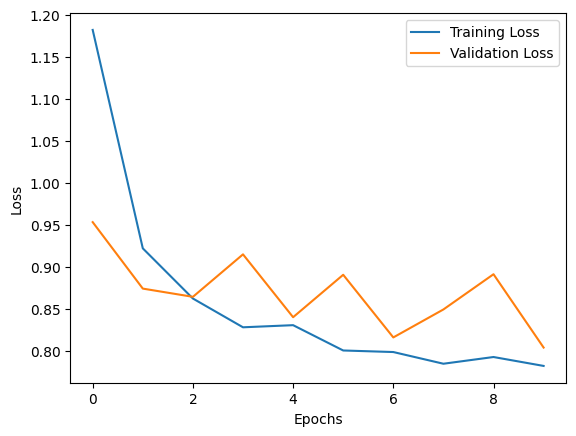

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

23/23 [==============================] - 33s 1s/step


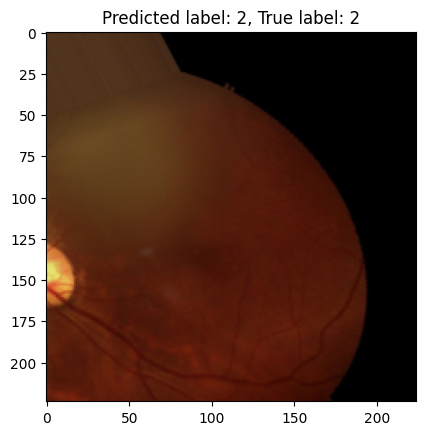

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# get the predicted class probabilities for the validation set
y_pred_prob = model.predict(validation_gen)

# get the predicted class for each sample in the validation set
y_pred = np.argmax(y_pred_prob, axis=1)

# get a batch of validation images and their true labels
x_val, y_val = next(validation_gen)

# select a random image from the batch
index = np.random.randint(len(x_val))

# get the predicted label for the selected image
label_pred = y_pred[18]

# get the true label for the selected image
label_true = y_val[18]

# get the image array for the selected image
img = x_val[18]

# display the image with the predicted and true labels
plt.imshow(img)
plt.title(f"Predicted label: {label_pred}, True label: {label_true}")
plt.show()